In [2]:
#import dependencies
import statsmodels.api as sm
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

%matplotlib notebook

In [3]:
#weekly gas prices in San Francisco Area
#read csv 
weekly_gas_prices = pd.read_csv("Resources/weekly_gas_prices_ca_2.csv")

#preview data
#weekly_gas_prices.head()

weekly_gas_prices = weekly_gas_prices.set_index("Date")
weekly_gas_prices = weekly_gas_prices.dropna()

#isolate data from 2013Sept-2014Sept
weekly_gas_prices_1314 = weekly_gas_prices.loc["2013-09-06":"2014-09-08",:]
weekly_gas_prices_1314.count()

Price    52
dtype: int64

In [4]:
#weekly_gas_prices.index

In [5]:
#save the gas price values into a list
gas_array = weekly_gas_prices_1314["Price"].values
gas_list = np.ndarray.tolist(gas_array)
len(gas_list)

52

In [6]:
#connect to Google
pytrends = TrendReq(hl='en-US', tz=360)

In [7]:
#set search parameter to 'Tesla'
kw_list = ['Tesla']
pytrends.build_payload(kw_list, cat=1380, timeframe='2013-09-09 2018-09-03', geo='US-CA',gprop='')

In [8]:
#import tesla google searches over time
tesla_searches = pytrends.interest_over_time()

#isolate data for the first 52 weeks from the data set
tesla_searches_1314 = tesla_searches.iloc[0:52,:]
tesla_searches_1314.head()

,Tesla,isPartial
date,,
2013-09-15,35,False
2013-09-22,28,False
2013-09-29,47,False
2013-10-06,25,False
2013-10-13,36,False


In [9]:
#append Tesla google search popularity to a list
tesla_array = tesla_searches_1314["Tesla"].values
tesla_list = np.ndarray.tolist(tesla_array)
len(tesla_list)

52

In [10]:
#set parameter to 'Electric car'
kw_list = ['Electric car']
pytrends.build_payload(kw_list, cat=1380, timeframe='2013-09-09 2018-09-03', geo='US-CA',gprop='')

In [11]:
#import Electric car Google searches over time
ecar_searches = pytrends.interest_over_time()
ecar_searches_1314 = ecar_searches.iloc[0:52,:]
ecar_searches_1314.head()

,Electric car,isPartial
date,,
2013-09-15,63,False
2013-09-22,52,False
2013-09-29,60,False
2013-10-06,49,False
2013-10-13,46,False


In [12]:
#append Electric car google search popularity to a list
ecar_array = ecar_searches_1314["Electric car"].values
ecar_list = np.ndarray.tolist(ecar_array)
len(ecar_list)

52

In [13]:
#set parameter to 'Prius'
kw_list = ['Prius']
pytrends.build_payload(kw_list, cat=1380, timeframe='2013-09-09 2018-09-03', geo='US-CA',gprop='')

In [14]:
#import Prius Google searches over time
prius_searches = pytrends.interest_over_time()
prius_searches_1314 = prius_searches.iloc[0:52,:]
prius_searches_1314.head()

,Prius,isPartial
date,,
2013-09-15,69,False
2013-09-22,45,False
2013-09-29,59,False
2013-10-06,41,False
2013-10-13,97,False


In [15]:
#append Prius Google search popularity to a list
prius_array = prius_searches_1314["Prius"].values
prius_list = np.ndarray.tolist(prius_array)
len(prius_list)

52

In [16]:
comparison_df = weekly_gas_prices_1314.assign(Tesla = tesla_list, Electric_Cars = ecar_list, Prius = prius_list)

comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2013-09-16,4.096,35,63,69
2013-09-23,4.052,28,52,45
2013-09-30,3.980,47,60,59
2013-10-07,3.898,25,49,41
2013-10-14,3.840,36,46,97


In [17]:
comparison_df['Price'] = comparison_df['Price']*10

comparison_df.head()


,Price,Tesla,Electric_Cars,Prius
Date,,,,
2013-09-16,40.96,35,63,69
2013-09-23,40.52,28,52,45
2013-09-30,39.80,47,60,59
2013-10-07,38.98,25,49,41
2013-10-14,38.40,36,46,97


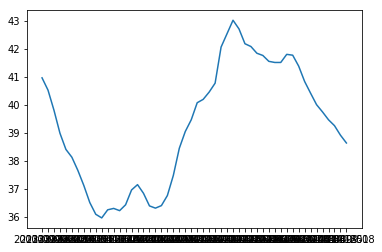

In [18]:
Price_df = comparison_df["Price"]

plt.plot(Price_df)

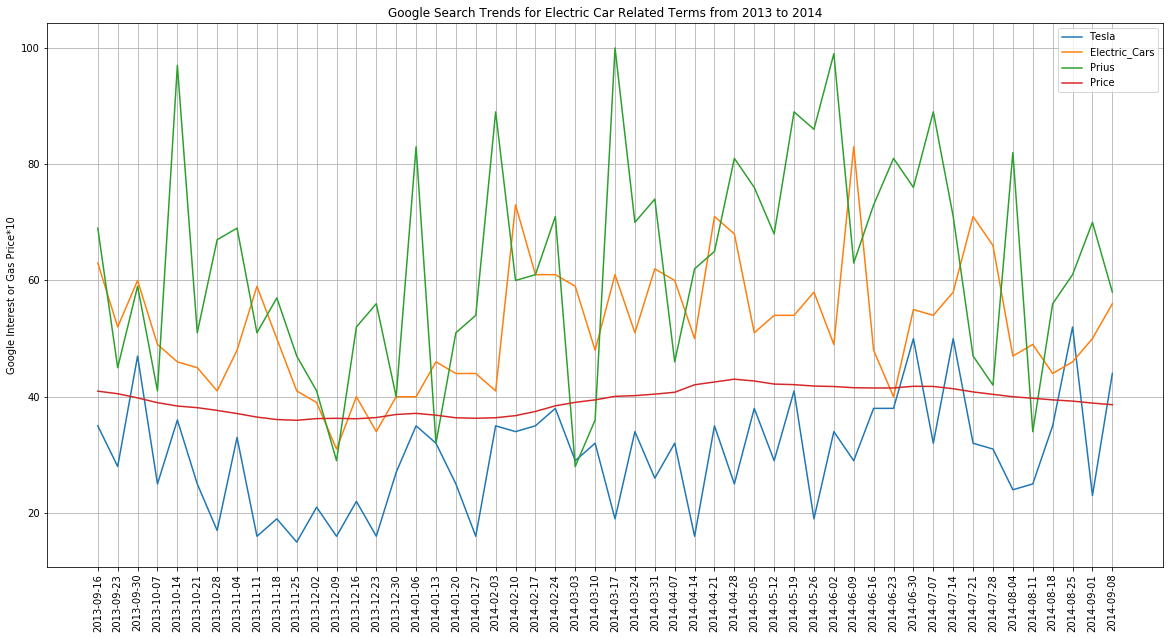

In [19]:
plt.figure(figsize=(20,10))
plt.plot(comparison_df["Tesla"])
plt.plot(comparison_df["Electric_Cars"])
plt.plot(comparison_df["Prius"])
plt.plot(comparison_df["Price"])
plt.title("Google Search Trends for Electric Car Related Terms from 2013 to 2014")
plt.ylabel("Google Interest or Gas Price*10")
plt.xticks(rotation=90)
plt.legend()
plt.savefig("Images/1314/trends_gasprice_comparison.png")
plt.grid()
plt.show()

In [19]:
#do a rolling average over the 5-year trends data to normalize the spikes for a better visual

from numpy import convolve
 
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

rolling_prius = movingaverage(prius_list,5)

rolling_ecar = movingaverage(ecar_list,5)

rolling_tesla = movingaverage(tesla_list, 5)

In [20]:
#remove first value from gas_list so there are the same amt of values

weekly_gas_prices_rolled = weekly_gas_prices_1314.iloc[4:]
weekly_gas_prices_rolled.head()

,Price
Date,
2013-10-14,3.840
2013-10-21,3.812
2013-10-28,3.765
2013-11-04,3.711
2013-11-11,3.650


In [21]:
#save the gas price values into a list
rolled_gas_array = weekly_gas_prices_rolled["Price"].values
rolled_gas_list = np.ndarray.tolist(rolled_gas_array)
len(rolled_gas_list)

48

In [22]:
rolling_comparison_df = weekly_gas_prices_rolled.assign(Tesla = rolling_tesla, Electric_Cars = rolling_ecar, Prius = rolling_prius)

rolling_comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2013-10-14,3.840,25.6,54.6,65.6
2013-10-21,3.812,23.2,53.2,64.4
2013-10-28,3.765,23.4,49.0,63.6
2013-11-04,3.711,22.0,45.0,63.2
2013-11-11,3.650,20.6,44.2,63.6


In [23]:
rolling_comparison_df['Price'] = rolling_comparison_df['Price']*10
rolling_comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2013-10-14,38.40,25.6,54.6,65.6
2013-10-21,38.12,23.2,53.2,64.4
2013-10-28,37.65,23.4,49.0,63.6
2013-11-04,37.11,22.0,45.0,63.2
2013-11-11,36.50,20.6,44.2,63.6


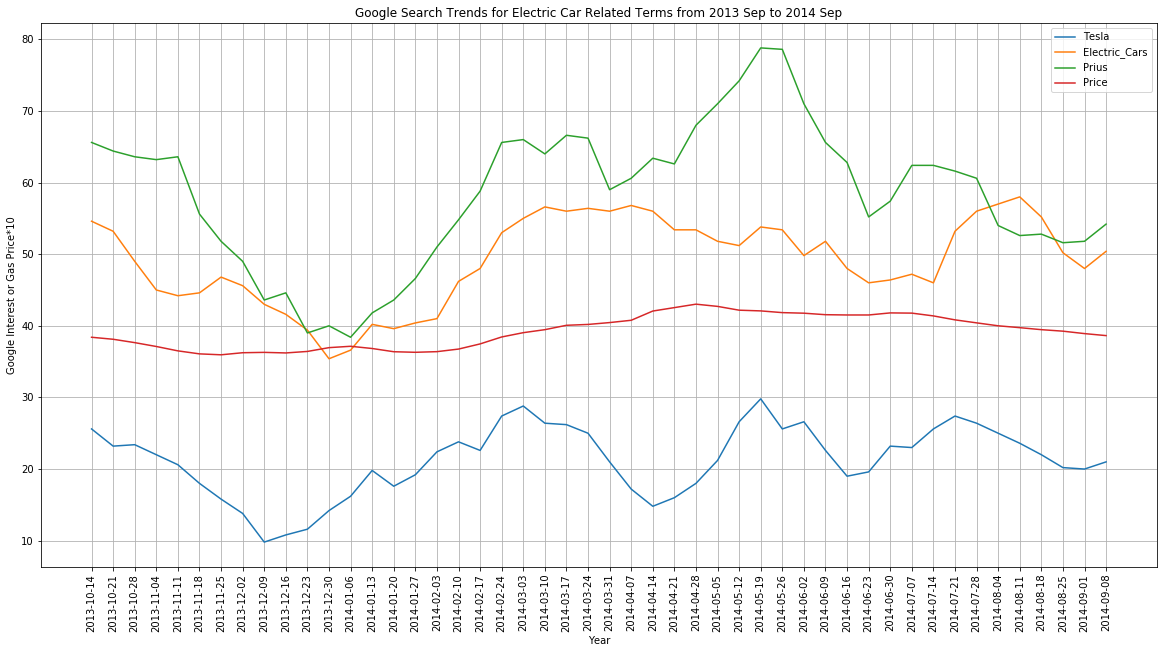

In [24]:
plt.figure(figsize=(20,10))
plt.plot(rolling_comparison_df["Tesla"])
plt.plot(rolling_comparison_df["Electric_Cars"])
plt.plot(rolling_comparison_df["Prius"])
plt.plot(rolling_comparison_df["Price"])

plt.title("Google Search Trends for Electric Car Related Terms from 2013 Sep to 2014 Sep")
plt.xlabel("Year")
plt.ylabel("Google Interest or Gas Price*10")
plt.legend()
plt.xticks(rotation=90)
plt.savefig("Images/1314/trends_gasprice_rollingcomparison.png")
plt.grid()
plt.show()

In [25]:
#STATISTICAL ANALYSIS

#compare gas price line (independant variable) with each google search result (dependent variables)

#OPTION 1: Create scatter plot for x=gas price y=trend
#          Calculate line of best fit
#          Try it with Prius first

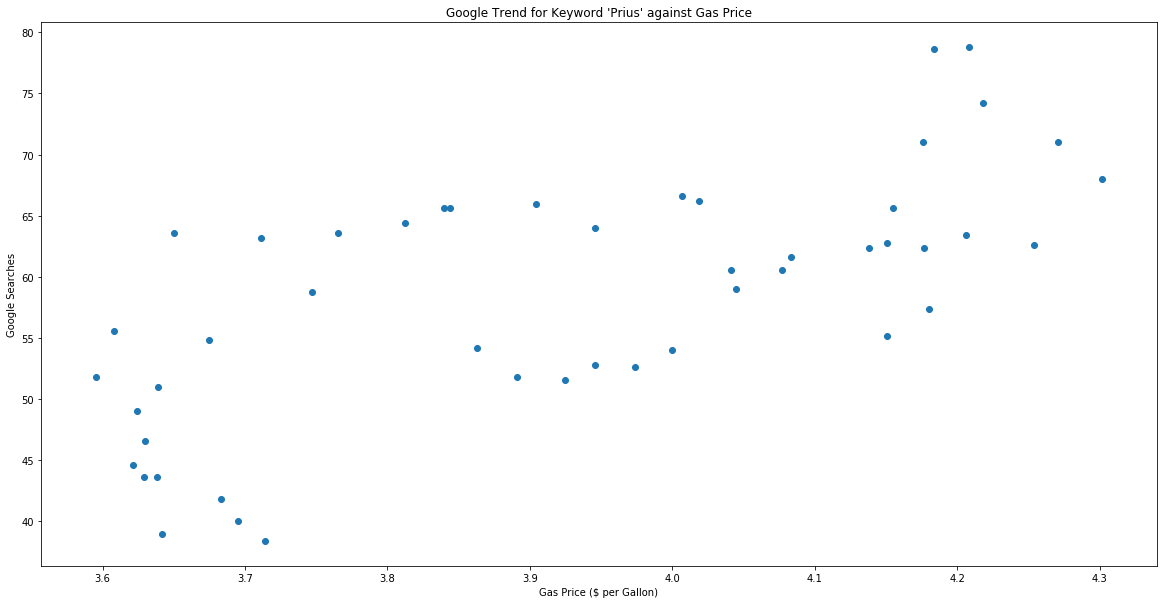

In [26]:
#scatter plot of gas prices v. prius searches

plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_prius, alpha=1)
plt.title("Google Trend for Keyword 'Prius' against Gas Price")
plt.xlabel("Gas Price ($ per Gallon)")
plt.ylabel("Google Searches")
plt.savefig("Images/1314/gasprice_rollingprius_scatter.png")

In [27]:
#try shifting prius data by subtracting 2 from front of list; subtract two from back of gas list to match value counts


In [28]:

#results = sm.OLS(prius_list,sm.add_constant(gas_list)).fit()


#plt.scatter(gas_list, prius_list)

#X_plot = np.linspace(0,1,100)
#plt.plot(X_plot, X_plot*results.params[0] + results.params[1])

#plt.show()

In [29]:
from numpy.polynomial.polynomial import polyfit

# Fit with polyfit
#b, m = polyfit(gas_list, prius_list, 1)

#plt.plot(gas_list, prius_list, '.')
#plt.plot(gas_list, b + m * gas_list, '-')
#plt.show()

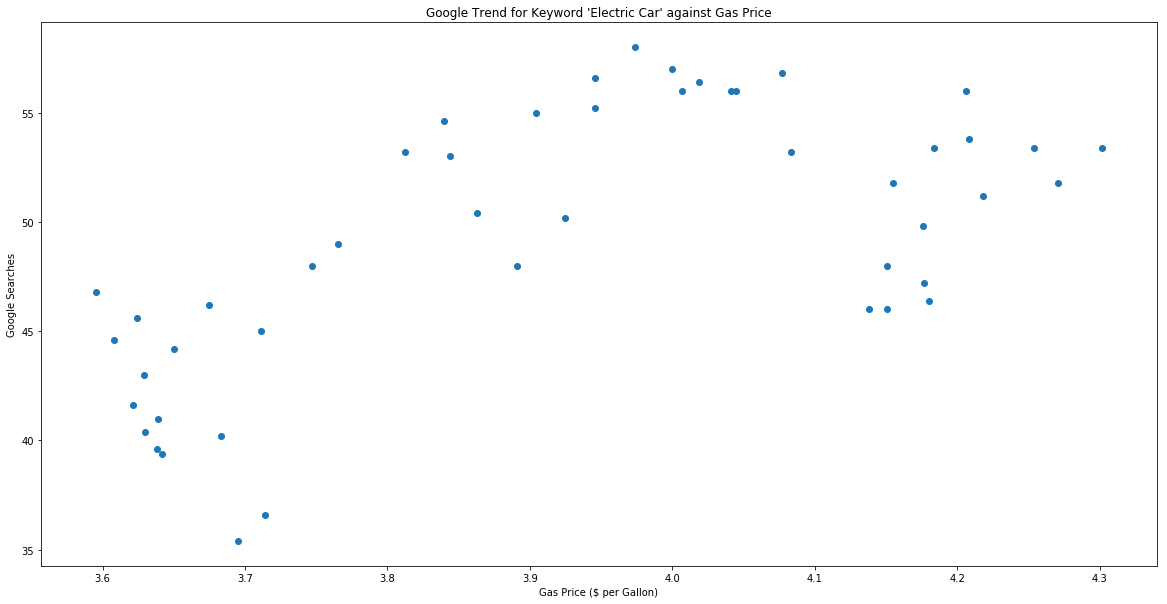

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_ecar, alpha=1)
plt.title("Google Trend for Keyword 'Electric Car' against Gas Price")
plt.xlabel("Gas Price ($ per Gallon)")
plt.ylabel("Google Searches")
plt.savefig("Images/1314/gasprice_rollingecar_scatter.png")

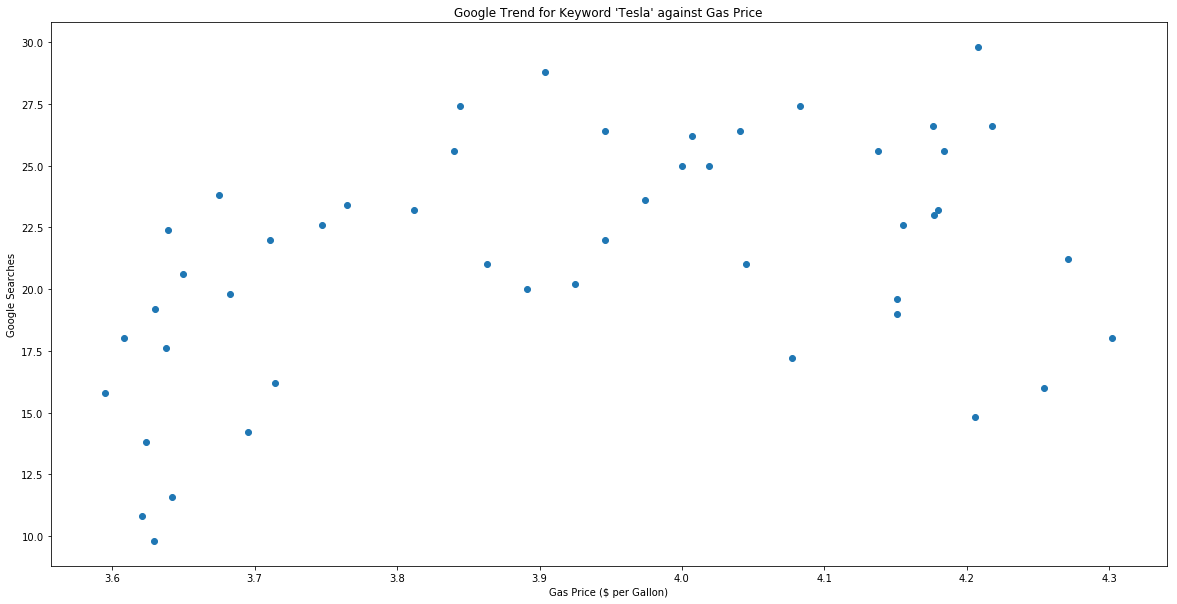

In [31]:
plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_tesla, alpha=1)
plt.title("Google Trend for Keyword 'Tesla' against Gas Price")
plt.xlabel("Gas Price ($ per Gallon)")
plt.ylabel("Google Searches")
plt.savefig("Images/1314/gasprice_rollingtesla_scatter.png")

In [32]:
#import numpy as np
#from numpy.polynomial.polynomial import polyfit
#import matplotlib.pyplot as plt

# Sample data
#x = np.arange(10)
#y = 5 * x + 10

#plt.figure(figsize=(20,10))
# Fit with polyfit
#b, m = polyfit(rolling_comparison_df["Price"], rolling_comparison_df["Tesla"], 1)

#plt.plot(rolling_comparison_df["Price"], rolling_comparison_df["Tesla"], '.')
#plt.plot(rolling_comparison_df["Price"], b + m * rolling_comparison_df["Tesla"], '-')
#plt.savefig("Images/1314/failed_polyfit.png")
#plt.show()

In [33]:
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(rolling_tesla, rolled_gas_list).fit()
predictions = model.predict(rolled_gas_list) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1105.
Date:                Wed, 12 Sep 2018   Prob (F-statistic):           2.62e-34
Time:                        20:11:08   Log-Likelihood:                -139.19
No. Observations:                  48   AIC:                             280.4
Df Residuals:                      47   BIC:                             282.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.4275      0.163     33.248      0.000       5.099       5.756
==============================================================================
Omnibus:                        2.774   Durbin-Watson:                   0.315
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                2.444
Skew:                          -0.454   Prob(JB):                        0.295
Kurtosis:                       2.368   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""